- You are working at a wine company and are tasked with building a wine quality model. At the end you will make a recommendation to the executive team on the types of wines the company should purchase to maximize quality.

- Dataset: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset?resource=download

- Prepare a written analysis that addresses the following:\
● What types of data cleaning or transformation did you perform?\
● What process did you take to build your predictive model?\
● What factors / features were predictive of wine quality?\
● What models and techniques did you test?\
● What were your results? Would you feel comfortable productioning this model, why or why not?\
● If you had more time, what other type of data would you want or techniques would you explore to improve your model fit?\
● Finally, what recommendation would you make to the CEO on the types of wines to target to maximize quality?


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Data

In [105]:
data = pd.read_csv('wines_SPA.csv')

# Exploratory Data Analysis

In [106]:
data.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [107]:
data.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [108]:
data.info()

# null-values: year, type, body, acidity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


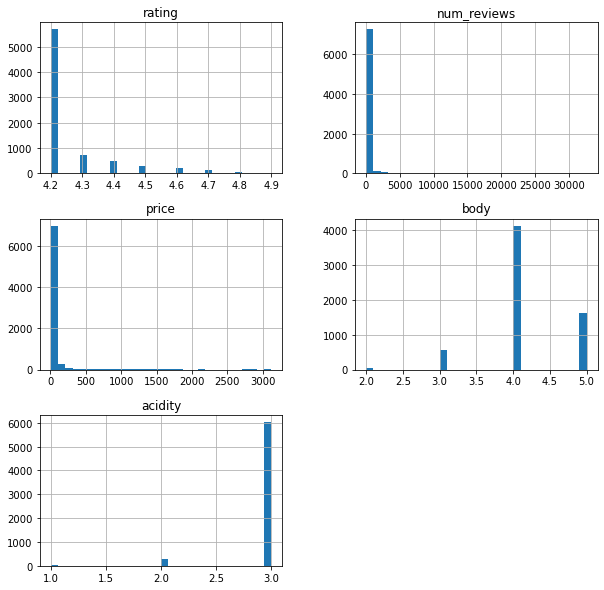

In [109]:
data.hist(bins=30, figsize=(10,10))
plt.show()

In [110]:
data.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

## year

In [111]:
data['year'].unique() # 'N.V.'

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [112]:
data = data[data['year']!='N.V.']
data = data[~data['year'].isna()]
data['duration'] = data['year'].apply(lambda x: 2022-int(x))

<AxesSubplot:xlabel='duration', ylabel='Count'>

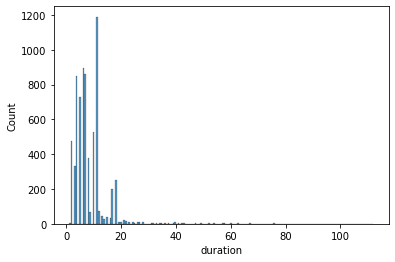

In [113]:
sns.histplot(data['duration'])

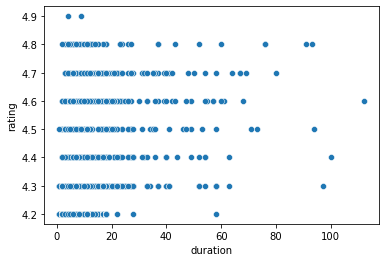

In [114]:
sns.scatterplot(x='duration', y='rating', data=data);

In [115]:
data[['duration', 'rating']].corr() 

,duration,rating
duration,1.000000,0.301122
rating,0.301122,1.000000


## winery 

In [116]:
print(data['winery'].nunique())

winery_groupby = data[['winery', 'rating']].groupby('winery').agg('count').sort_values('rating', ascending=False)
winery_groupby = winery_groupby.reset_index()
print(winery_groupby.head(3))

445
          winery  rating
0        Contino     457
1         Artadi     261
2  La Rioja Alta     254


445
          winery  rating
0        Contino     457
1         Artadi     261
2  La Rioja Alta     254


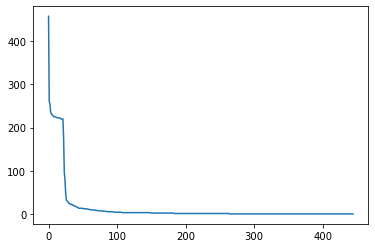

In [117]:
plt.plot(winery_groupby['rating']);

print(data['winery'].nunique())

winery_groupby = data[['winery', 'rating']].groupby('winery').agg('count').sort_values('rating', ascending=False)
winery_groupby = winery_groupby.reset_index()
print(winery_groupby.head(3))

In [118]:
high_pop_winery_lst = winery_groupby[winery_groupby['rating']>=200]['winery'].tolist()
mid_pop_winery_lst = winery_groupby[(winery_groupby['rating']<200) & (winery_groupby['rating']>=100)]['winery'].tolist()
data['winery_pop_type'] = data['winery'].apply(lambda x: '2' if x in high_pop_winery_lst else ('1' if x in mid_pop_winery_lst else '0'))
data.head(3)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,duration,winery_pop_type
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,9,0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,4,2
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,13,0


# Wine

## Country

In [119]:
data.country.nunique()

1

In [120]:
data.drop(columns='country', inplace=True)

# Region

In [121]:
data.region.nunique()

region_groupby = data[['region', 'rating']].groupby('region').agg('count').sort_values('rating', ascending=False)
region_groupby = region_groupby.reset_index()
print(region_groupby.head(3))

             region  rating
0             Rioja    2440
1  Ribera del Duero    1412
2          Priorato     686


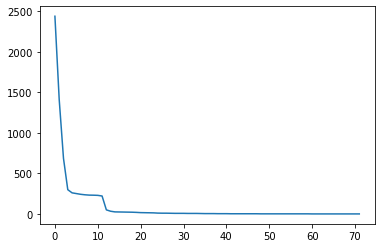

In [122]:
plt.plot(region_groupby['rating']);

In [123]:
high_pop_region_lst = region_groupby[region_groupby['rating']>=250]['region'].tolist()
mid_pop_region_lst = region_groupby[(region_groupby['rating']<250) & (region_groupby['rating']>=50)]['region'].tolist()
data['region_pop_type'] = data['region'].apply(lambda x: '2' if x in high_pop_region_lst else ('1' if x in mid_pop_region_lst else '0'))
data.head(3)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity,duration,winery_pop_type,region_pop_type
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0,9,0,2
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0,4,2,2
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,13,0,2


## type

In [124]:
print(data.type.nunique())
data = data[~data['type'].isna()]
data.type.info()

21
<class 'pandas.core.series.Series'>
Int64Index: 6672 entries, 0 to 7499
Series name: type
Non-Null Count  Dtype 
--------------  ----- 
6672 non-null   object
dtypes: object(1)
memory usage: 104.2+ KB


## body

In [125]:
print(data.body.nunique())
data.body.describe()

4


count    6070.000000
mean        4.163756
std         0.593981
min         2.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: body, dtype: float64

In [126]:
data.body.fillna(4.0, inplace=True)

## acidity

In [127]:
print(data.acidity.nunique())
data.acidity.describe()

3


count    6070.000000
mean        2.947117
std         0.242883
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: acidity, dtype: float64

In [128]:
data.acidity.fillna(3.0, inplace=True)

In [129]:
data.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'region', 'price',
       'type', 'body', 'acidity', 'duration', 'winery_pop_type',
       'region_pop_type'],
      dtype='object')

## num_reviews

/Users/wenxinzhang/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


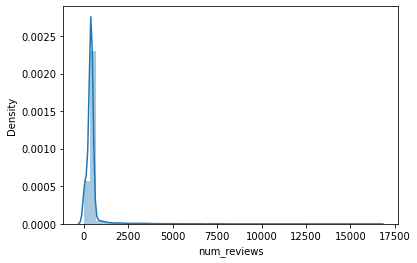

In [130]:
sns.distplot(data['num_reviews']);

In [131]:
data['num_reviews_'] = np.log(data['num_reviews'])

/Users/wenxinzhang/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


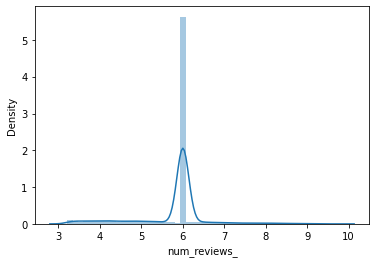

In [132]:
sns.distplot(data['num_reviews_']);

## price

/Users/wenxinzhang/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


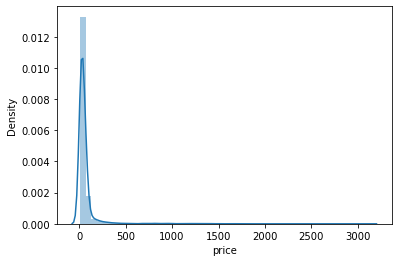

In [133]:
sns.distplot(data.price);

## 

In [134]:
data['price_'] = np.log(data['price'])

/Users/wenxinzhang/miniconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


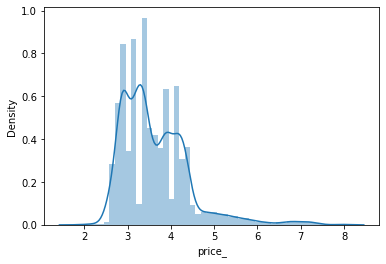

In [135]:
sns.distplot(data['price_']);

## get_dummies

In [136]:
data['body'] = data['body'].apply(lambda x: str(x))
data['acidity'] = data['acidity'].apply(lambda x: str(x))

In [137]:
data_cat = data[['type', 'body', 'acidity', 'winery_pop_type', 'region_pop_type']]
data_cat_dummy = pd.get_dummies(data_cat)
data_cat_dummy

,type_Albarino,type_Cabernet Sauvignon,type_Cava,type_Chardonnay,type_Grenache,type_Mencia,type_Monastrell,type_Montsant Red,type_Pedro Ximenez,type_Priorat Red,...,body_5.0,acidity_1.0,acidity_2.0,acidity_3.0,winery_pop_type_0,winery_pop_type_1,winery_pop_type_2,region_pop_type_0,region_pop_type_1,region_pop_type_2
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7496,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
7498,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [138]:
data_num = data[['duration', 'num_reviews_', 'price_', 'rating']]
data_ = pd.concat([data_num, data_cat_dummy], axis=1)
data_.head()

,duration,num_reviews_,price_,rating,type_Albarino,type_Cabernet Sauvignon,type_Cava,type_Chardonnay,type_Grenache,type_Mencia,...,body_5.0,acidity_1.0,acidity_2.0,acidity_3.0,winery_pop_type_0,winery_pop_type_1,winery_pop_type_2,region_pop_type_0,region_pop_type_1,region_pop_type_2
0,9,4.060443,6.902743,4.9,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,4,3.433987,5.747799,4.9,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,13,7.491645,5.783671,4.8,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
3,23,7.441320,6.540972,4.8,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,26,7.177019,6.656804,4.8,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


## make predictions

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
y = data_[['rating']]
X = data_.drop('rating', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8, shuffle=True, stratify=None)

In [141]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=20, random_state=8)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred

/var/folders/ph/0rdmgdvx03z3s71c_pjyjg_r0000gn/T/ipykernel_97270/242473205.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


array([4.2  , 4.38 , 4.2  , ..., 4.796, 4.2  , 4.2  ])

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.0027700531912730904
0.02194352383074731


In [143]:
feature_importance = pd.DataFrame({'feature': X_test.columns, 'feature_importance':regr.feature_importances_})
feature_importance = feature_importance.sort_values(by='feature_importance', ascending=False)
feature_importance

,feature,feature_importance
31,winery_pop_type_0,0.403846
2,price_,0.384525
1,num_reviews_,0.121825
0,duration,0.040747
27,body_5.0,0.006569
26,body_4.0,0.006371
14,type_Ribera Del Duero Red,0.003504
15,type_Rioja Red,0.003442
34,region_pop_type_0,0.003371
12,type_Priorat Red,0.003264
